In [1]:
import pandas as pd

data = pd.read_excel('Final_Labelled_Data_new_ham.xlsx', engine='openpyxl')
data.head(-1)

code ham/spam                                            message  \
0      1.0      ham  004645 is SECRET OTP for txn of INR 11893.00 o...   
1      1.0      ham  133355 is your OTP for conﬁrmation. Regards AP...   
2      1.0      ham  223316 is your OTP for conﬁrmation. Regards AP...   
3      1.0      ham  237222 is your OTP for conﬁrmation. Regards AP...   
4      1.0      ham  269220 is SECRET OTP for txn of INR 11893.00 o...   
...    ...      ...                                                ...   
2809   4.0      ham  నాటికి 50% రోజువారీ డేటా కోటా ఉపయోగించబడింది.\...   
2810   4.0      ham  మీకు ఇతర డేటా ప్లాన్ లేకపోతే, 2 GB డేటా కోటా వ...   
2811   1.0      ham  మీ Jio నంబర్ 9398999815 యొక్క ప్లాన్ గడువు త్వ...   
2812   1.0      ham  Dear Customer, You have 2 missed calls from +9...   
2813   1.0      ham  BOOKMYSHOW has requested money from you on you...   

     language                                    translated_text  \
0     english  004645 is SECRET OTP for txn of INR 11893.00 o...   
1     english  133355 is your OTP for conﬁrmation. Regards AP...   
2     english  223316 is your OTP for conﬁrmation. Regards AP...   
3     english  237222 is your OTP for conﬁrmation. Regards AP...   
4     english  269220 is SECRET OTP for txn of INR 11893.00 o...   
...       ...                                                ...   
2809   telugu  By 50% daily data quota was used.\nGeo Number:...   
2810   telugu  If you do not have other data plan, 2 GB data ...   
2811   telugu  The Plan's plan of your JIO number 9398999815 ...   
2812  english  Dear Customer, You have 2 missed calls from +9...   
2813  english  BOOKMYSHOW has requested money from you on you...   

     otp_transactions_other otp_transactions_other_new  
0                       OTP                transaction  
1                       OTP                        OTP  
2                       OTP                        OTP  
3                       OTP                        OTP  
4                       OTP                transaction  
...                     ...                        ...  
2809            transaction                   personal  
2810            transaction                   personal  
2811                  other                   personal  
2812                  other                   personal  
2813            transaction                transaction  

[2814 rows x 7 columns]

In [2]:
data['language'].value_counts()

english     2477
telugu       220
hinglish     105
hindi         13
Name: language, dtype: int64

In [3]:
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
data['ham_spam_numeric'] = labelencoder.fit_transform(data['ham/spam'])
data['otp_transaction_numeric'] = labelencoder.fit_transform(data['otp_transactions_other_new'])
data.head(-1)

code ham/spam                                            message  \
0      1.0      ham  004645 is SECRET OTP for txn of INR 11893.00 o...   
1      1.0      ham  133355 is your OTP for conﬁrmation. Regards AP...   
2      1.0      ham  223316 is your OTP for conﬁrmation. Regards AP...   
3      1.0      ham  237222 is your OTP for conﬁrmation. Regards AP...   
4      1.0      ham  269220 is SECRET OTP for txn of INR 11893.00 o...   
...    ...      ...                                                ...   
2809   4.0      ham  నాటికి 50% రోజువారీ డేటా కోటా ఉపయోగించబడింది.\...   
2810   4.0      ham  మీకు ఇతర డేటా ప్లాన్ లేకపోతే, 2 GB డేటా కోటా వ...   
2811   1.0      ham  మీ Jio నంబర్ 9398999815 యొక్క ప్లాన్ గడువు త్వ...   
2812   1.0      ham  Dear Customer, You have 2 missed calls from +9...   
2813   1.0      ham  BOOKMYSHOW has requested money from you on you...   

     language                                    translated_text  \
0     english  004645 is SECRET OTP for txn of INR 11893.00 o...   
1     english  133355 is your OTP for conﬁrmation. Regards AP...   
2     english  223316 is your OTP for conﬁrmation. Regards AP...   
3     english  237222 is your OTP for conﬁrmation. Regards AP...   
4     english  269220 is SECRET OTP for txn of INR 11893.00 o...   
...       ...                                                ...   
2809   telugu  By 50% daily data quota was used.\nGeo Number:...   
2810   telugu  If you do not have other data plan, 2 GB data ...   
2811   telugu  The Plan's plan of your JIO number 9398999815 ...   
2812  english  Dear Customer, You have 2 missed calls from +9...   
2813  english  BOOKMYSHOW has requested money from you on you...   

     otp_transactions_other otp_transactions_other_new  ham_spam_numeric  \
0                       OTP                transaction                 0   
1                       OTP                        OTP                 0   
2                       OTP                        OTP                 0   
3                       OTP                        OTP                 0   
4                       OTP                transaction                 0   
...                     ...                        ...               ...   
2809            transaction                   personal                 0   
2810            transaction                   personal                 0   
2811                  other                   personal                 0   
2812                  other                   personal                 0   
2813            transaction                transaction                 0   

      otp_transaction_numeric  
0                           3  
1                           0  
2                           0  
3                           0  
4                           3  
...                       ...  
2809                        2  
2810                        2  
2811                        2  
2812                        2  
2813                        3  

[2814 rows x 9 columns]

In [4]:
print(data['ham/spam'].value_counts())
print(data['ham_spam_numeric'].value_counts())
print(data['otp_transactions_other_new'].value_counts())
print(data['otp_transaction_numeric'].value_counts())

ham    2815
Name: ham/spam, dtype: int64
0    2815
Name: ham_spam_numeric, dtype: int64
personal       1546
transaction     900
OTP             232
delivery        137
Name: otp_transactions_other_new, dtype: int64
2    1546
3     900
0     232
1     137
Name: otp_transaction_numeric, dtype: int64


In [5]:
target_ham = ['ham']
target_transaction = ['OTP','delivery','personal','transaction']

# Preprocessing

In [6]:
import re
import numpy as np 
import pandas as pd 
import csv
import re, string
!pip install nltk
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd 

#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS 

  

def text_process(text):
    text = text.lower()   
    #Remove urls
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text)    
    #Remove usernames
    text = re.sub('@[^\s]+','',text)    
    #Remove white space
    text = text.strip()    
    #Remove hashtags
    text = re.sub(r'#([^\s]+)', '', text)   
    #Remove stopwords
    text = " ".join([word for word in text.split(' ') if word not in stopwords.words('english')])
    #Remove punctuation
    text = "".join(l for l in text if l not in string.punctuation)
    return text

data['message_clean']=data['message'].apply(text_process)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sarangs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
data.head(-1)

code ham/spam                                            message  \
0      1.0      ham  004645 is SECRET OTP for txn of INR 11893.00 o...   
1      1.0      ham  133355 is your OTP for conﬁrmation. Regards AP...   
2      1.0      ham  223316 is your OTP for conﬁrmation. Regards AP...   
3      1.0      ham  237222 is your OTP for conﬁrmation. Regards AP...   
4      1.0      ham  269220 is SECRET OTP for txn of INR 11893.00 o...   
...    ...      ...                                                ...   
2809   4.0      ham  నాటికి 50% రోజువారీ డేటా కోటా ఉపయోగించబడింది.\...   
2810   4.0      ham  మీకు ఇతర డేటా ప్లాన్ లేకపోతే, 2 GB డేటా కోటా వ...   
2811   1.0      ham  మీ Jio నంబర్ 9398999815 యొక్క ప్లాన్ గడువు త్వ...   
2812   1.0      ham  Dear Customer, You have 2 missed calls from +9...   
2813   1.0      ham  BOOKMYSHOW has requested money from you on you...   

     language                                    translated_text  \
0     english  004645 is SECRET OTP for txn of INR 11893.00 o...   
1     english  133355 is your OTP for conﬁrmation. Regards AP...   
2     english  223316 is your OTP for conﬁrmation. Regards AP...   
3     english  237222 is your OTP for conﬁrmation. Regards AP...   
4     english  269220 is SECRET OTP for txn of INR 11893.00 o...   
...       ...                                                ...   
2809   telugu  By 50% daily data quota was used.\nGeo Number:...   
2810   telugu  If you do not have other data plan, 2 GB data ...   
2811   telugu  The Plan's plan of your JIO number 9398999815 ...   
2812  english  Dear Customer, You have 2 missed calls from +9...   
2813  english  BOOKMYSHOW has requested money from you on you...   

     otp_transactions_other otp_transactions_other_new  ham_spam_numeric  \
0                       OTP                transaction                 0   
1                       OTP                        OTP                 0   
2                       OTP                        OTP                 0   
3                       OTP                        OTP                 0   
4                       OTP                transaction                 0   
...                     ...                        ...               ...   
2809            transaction                   personal                 0   
2810            transaction                   personal                 0   
2811                  other                   personal                 0   
2812                  other                   personal                 0   
2813            transaction                transaction                 0   

      otp_transaction_numeric  \
0                           3   
1                           0   
2                           0   
3                           0   
4                           3   
...                       ...   
2809                        2   
2810                        2   
2811                        2   
2812                        2   
2813                        3   

                                          message_clean  
0     004645 secret otp txn inr 1189300 axis bank ca...  
1                133355 otp conﬁrmation regards ap sand  
2                223316 otp conﬁrmation regards ap sand  
3                237222 otp conﬁrmation regards ap sand  
4     269220 secret otp txn inr 1189300 axis bank ca...  
...                                                 ...  
2809  నాటికి 50 రోజువారీ డేటా కోటా ఉపయోగించబడింది\nజ...  
2810  మీకు ఇతర డేటా ప్లాన్ లేకపోతే 2 gb డేటా కోటా వి...  
2811  మీ jio నంబర్ 9398999815 యొక్క ప్లాన్ గడువు త్వ...  
2812  dear customer 2 missed calls 916301441597 last...  
2813  bookmyshow requested money google pay app appr...  

[2814 rows x 10 columns]

In [8]:
#calculating the length of sentences in text column 
data['length_processed']=data['message_clean'].apply(len)
data.head(-1)

code ham/spam                                            message  \
0      1.0      ham  004645 is SECRET OTP for txn of INR 11893.00 o...   
1      1.0      ham  133355 is your OTP for conﬁrmation. Regards AP...   
2      1.0      ham  223316 is your OTP for conﬁrmation. Regards AP...   
3      1.0      ham  237222 is your OTP for conﬁrmation. Regards AP...   
4      1.0      ham  269220 is SECRET OTP for txn of INR 11893.00 o...   
...    ...      ...                                                ...   
2809   4.0      ham  నాటికి 50% రోజువారీ డేటా కోటా ఉపయోగించబడింది.\...   
2810   4.0      ham  మీకు ఇతర డేటా ప్లాన్ లేకపోతే, 2 GB డేటా కోటా వ...   
2811   1.0      ham  మీ Jio నంబర్ 9398999815 యొక్క ప్లాన్ గడువు త్వ...   
2812   1.0      ham  Dear Customer, You have 2 missed calls from +9...   
2813   1.0      ham  BOOKMYSHOW has requested money from you on you...   

     language                                    translated_text  \
0     english  004645 is SECRET OTP for txn of INR 11893.00 o...   
1     english  133355 is your OTP for conﬁrmation. Regards AP...   
2     english  223316 is your OTP for conﬁrmation. Regards AP...   
3     english  237222 is your OTP for conﬁrmation. Regards AP...   
4     english  269220 is SECRET OTP for txn of INR 11893.00 o...   
...       ...                                                ...   
2809   telugu  By 50% daily data quota was used.\nGeo Number:...   
2810   telugu  If you do not have other data plan, 2 GB data ...   
2811   telugu  The Plan's plan of your JIO number 9398999815 ...   
2812  english  Dear Customer, You have 2 missed calls from +9...   
2813  english  BOOKMYSHOW has requested money from you on you...   

     otp_transactions_other otp_transactions_other_new  ham_spam_numeric  \
0                       OTP                transaction                 0   
1                       OTP                        OTP                 0   
2                       OTP                        OTP                 0   
3                       OTP                        OTP                 0   
4                       OTP                transaction                 0   
...                     ...                        ...               ...   
2809            transaction                   personal                 0   
2810            transaction                   personal                 0   
2811                  other                   personal                 0   
2812                  other                   personal                 0   
2813            transaction                transaction                 0   

      otp_transaction_numeric  \
0                           3   
1                           0   
2                           0   
3                           0   
4                           3   
...                       ...   
2809                        2   
2810                        2   
2811                        2   
2812                        2   
2813                        3   

                                          message_clean  length_processed  
0     004645 secret otp txn inr 1189300 axis bank ca...               114  
1                133355 otp conﬁrmation regards ap sand                38  
2                223316 otp conﬁrmation regards ap sand                38  
3                237222 otp conﬁrmation regards ap sand                38  
4     269220 secret otp txn inr 1189300 axis bank ca...               114  
...                                                 ...               ...  
2809  నాటికి 50 రోజువారీ డేటా కోటా ఉపయోగించబడింది\nజ...               292  
2810  మీకు ఇతర డేటా ప్లాన్ లేకపోతే 2 gb డేటా కోటా వి...               268  
2811  మీ jio నంబర్ 9398999815 యొక్క ప్లాన్ గడువు త్వ...               223  
2812  dear customer 2 missed calls 916301441597 last...                94  
2813  bookmyshow requested money google pay app appr...                84  

[2814 rows x 11 columns]

In [9]:
#calculating the length of sentences in text column 
data['length_original']=data['message'].apply(len)
data.head(-1)

code ham/spam                                            message  \
0      1.0      ham  004645 is SECRET OTP for txn of INR 11893.00 o...   
1      1.0      ham  133355 is your OTP for conﬁrmation. Regards AP...   
2      1.0      ham  223316 is your OTP for conﬁrmation. Regards AP...   
3      1.0      ham  237222 is your OTP for conﬁrmation. Regards AP...   
4      1.0      ham  269220 is SECRET OTP for txn of INR 11893.00 o...   
...    ...      ...                                                ...   
2809   4.0      ham  నాటికి 50% రోజువారీ డేటా కోటా ఉపయోగించబడింది.\...   
2810   4.0      ham  మీకు ఇతర డేటా ప్లాన్ లేకపోతే, 2 GB డేటా కోటా వ...   
2811   1.0      ham  మీ Jio నంబర్ 9398999815 యొక్క ప్లాన్ గడువు త్వ...   
2812   1.0      ham  Dear Customer, You have 2 missed calls from +9...   
2813   1.0      ham  BOOKMYSHOW has requested money from you on you...   

     language                                    translated_text  \
0     english  004645 is SECRET OTP for txn of INR 11893.00 o...   
1     english  133355 is your OTP for conﬁrmation. Regards AP...   
2     english  223316 is your OTP for conﬁrmation. Regards AP...   
3     english  237222 is your OTP for conﬁrmation. Regards AP...   
4     english  269220 is SECRET OTP for txn of INR 11893.00 o...   
...       ...                                                ...   
2809   telugu  By 50% daily data quota was used.\nGeo Number:...   
2810   telugu  If you do not have other data plan, 2 GB data ...   
2811   telugu  The Plan's plan of your JIO number 9398999815 ...   
2812  english  Dear Customer, You have 2 missed calls from +9...   
2813  english  BOOKMYSHOW has requested money from you on you...   

     otp_transactions_other otp_transactions_other_new  ham_spam_numeric  \
0                       OTP                transaction                 0   
1                       OTP                        OTP                 0   
2                       OTP                        OTP                 0   
3                       OTP                        OTP                 0   
4                       OTP                transaction                 0   
...                     ...                        ...               ...   
2809            transaction                   personal                 0   
2810            transaction                   personal                 0   
2811                  other                   personal                 0   
2812                  other                   personal                 0   
2813            transaction                transaction                 0   

      otp_transaction_numeric  \
0                           3   
1                           0   
2                           0   
3                           0   
4                           3   
...                       ...   
2809                        2   
2810                        2   
2811                        2   
2812                        2   
2813                        3   

                                          message_clean  length_processed  \
0     004645 secret otp txn inr 1189300 axis bank ca...               114   
1                133355 otp conﬁrmation regards ap sand                38   
2                223316 otp conﬁrmation regards ap sand                38   
3                237222 otp conﬁrmation regards ap sand                38   
4     269220 secret otp txn inr 1189300 axis bank ca...               114   
...                                                 ...               ...   
2809  నాటికి 50 రోజువారీ డేటా కోటా ఉపయోగించబడింది\nజ...               292   
2810  మీకు ఇతర డేటా ప్లాన్ లేకపోతే 2 gb డేటా కోటా వి...               268   
2811  మీ jio నంబర్ 9398999815 యొక్క ప్లాన్ గడువు త్వ...               223   
2812  dear customer 2 missed calls 916301441597 last...                94   
2813  bookmyshow requested money google pay app appr...                84   

      length_original  
0                 157  
1                

In [10]:
data['otp_transactions_other_new'].value_counts()

personal       1546
transaction     900
OTP             232
delivery        137
Name: otp_transactions_other_new, dtype: int64

In [11]:
data['otp_transaction_numeric'].value_counts()

2    1546
3     900
0     232
1     137
Name: otp_transaction_numeric, dtype: int64

In [12]:
data.to_excel('Final_Labelled_Dataset_Preprocessed_new_ham.xlsx', index=False)

# Graphs

<AxesSubplot:ylabel='Frequency'>

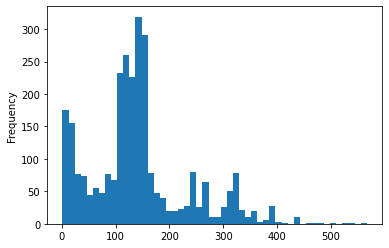

In [13]:
data['length_original'].plot(bins=50,kind='hist')

<AxesSubplot:ylabel='Frequency'>

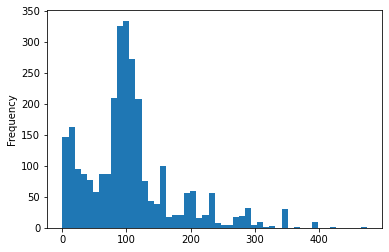

In [14]:
data['length_processed'].plot(bins=50,kind='hist')

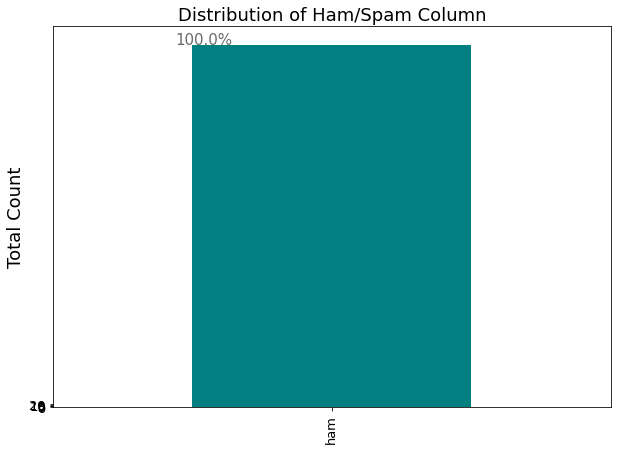

In [15]:
ax = data['ham/spam'].value_counts().plot(kind='bar', figsize=(10,7),
                                        color="teal", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Distribution of Ham/Spam Column", fontsize=18)
ax.set_ylabel("Total Count", fontsize=18);
ax.set_yticks([0, 5, 10, 15, 20])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

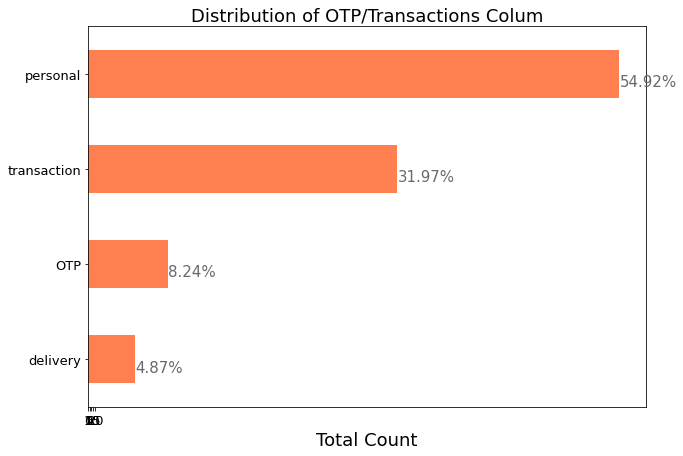

In [16]:
ax = data['otp_transactions_other_new'].value_counts().plot(kind='barh', figsize=(10,7),
                                        color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Distribution of OTP/Transactions Colum", fontsize=18)
ax.set_xlabel("Total Count", fontsize=18);
ax.set_xticks([0, 5, 10, 15, 20])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

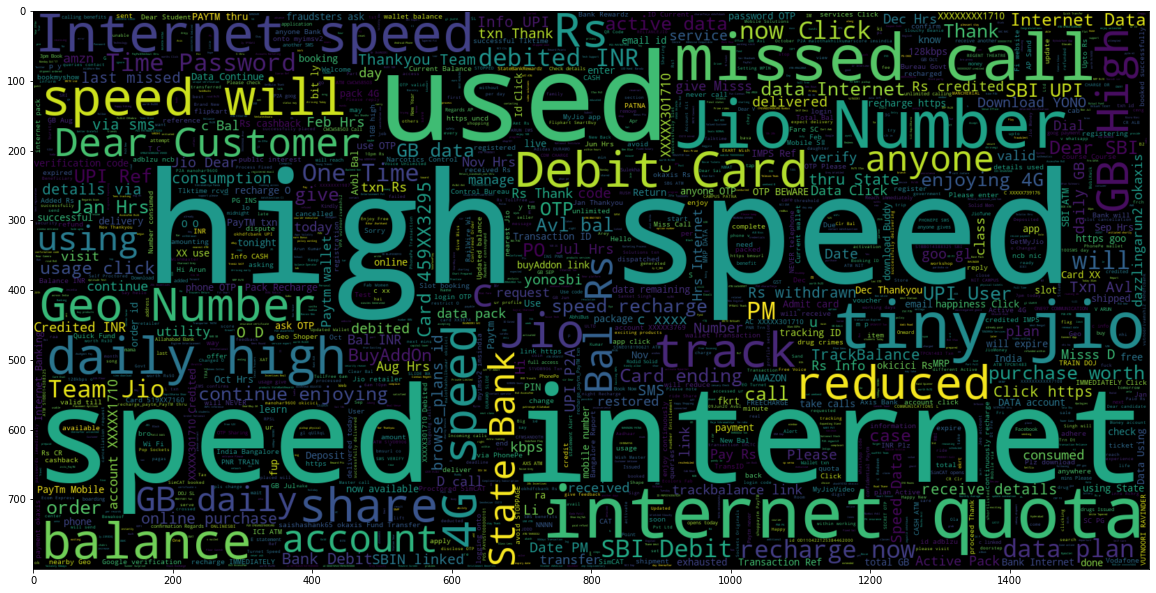

In [17]:
#ham

from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Negative Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.ham_spam_numeric == 0].translated_text))
plt.imshow(wc , interpolation = 'bilinear')

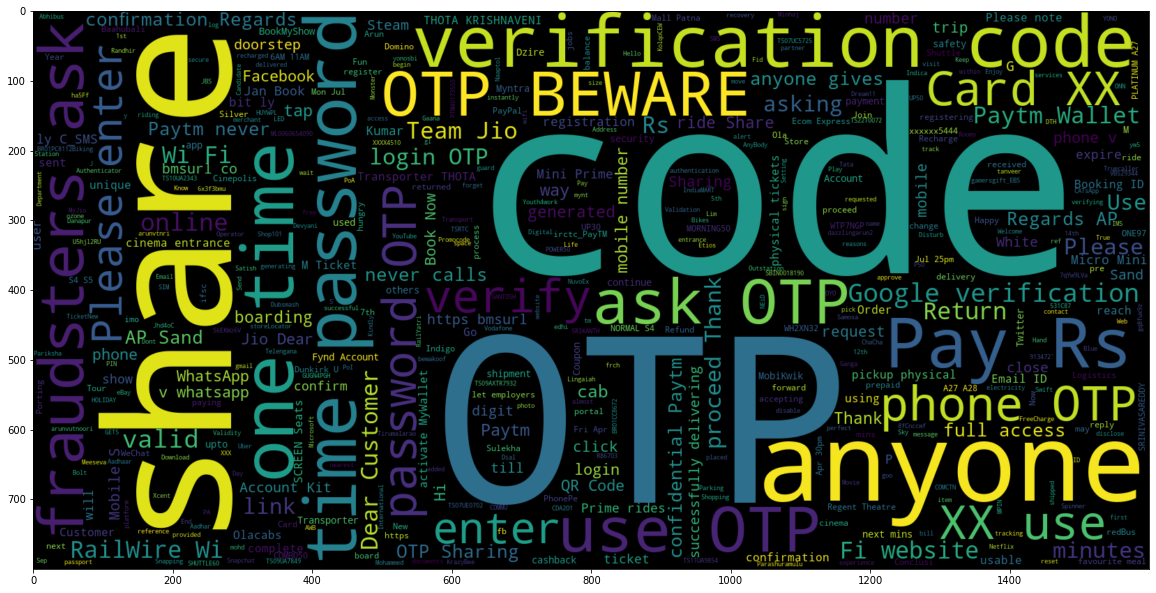

In [18]:
#OTP

from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Negative Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.otp_transaction_numeric == 0].translated_text))
plt.imshow(wc , interpolation = 'bilinear')

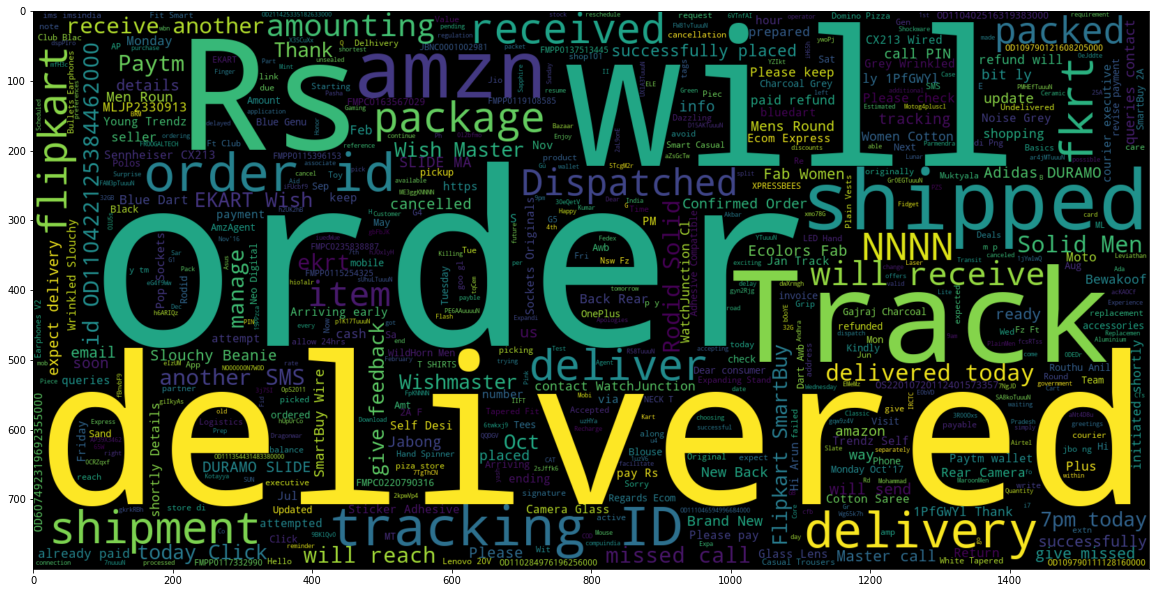

In [19]:
#delivery

from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Negative Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.otp_transaction_numeric == 1].translated_text))
plt.imshow(wc , interpolation = 'bilinear')

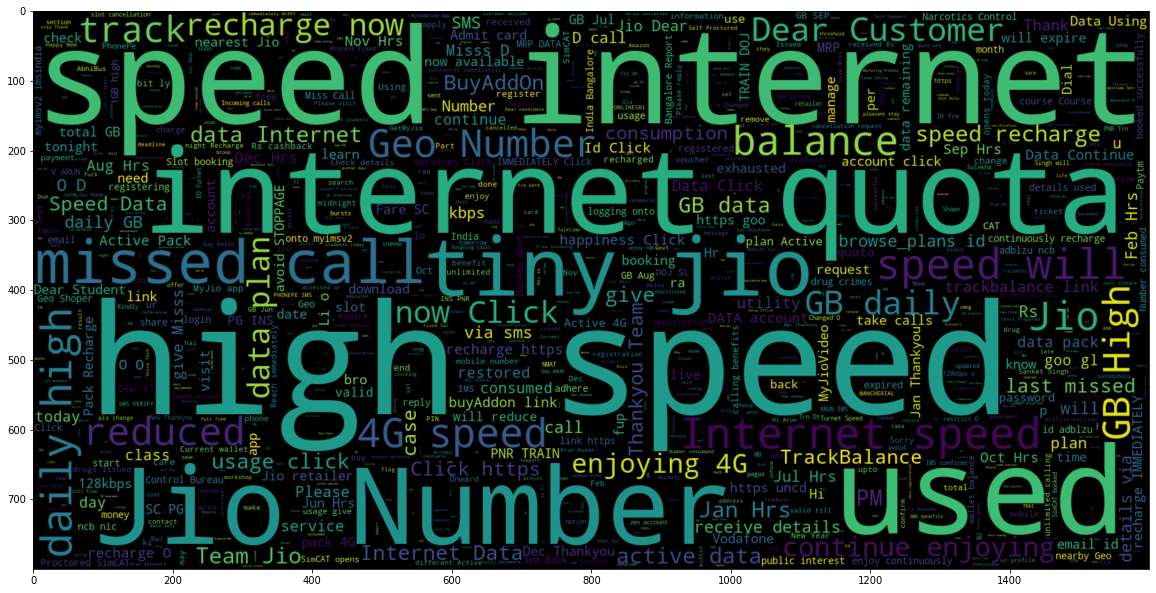

In [20]:
#other

from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Negative Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.otp_transaction_numeric == 2].translated_text))
plt.imshow(wc , interpolation = 'bilinear')

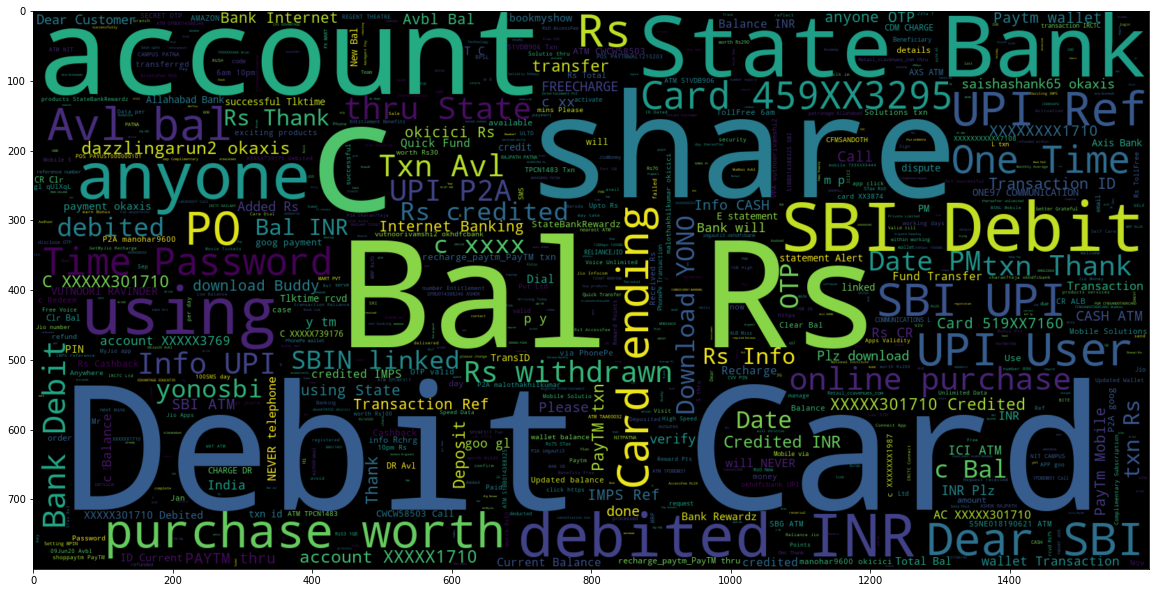

In [21]:
#transaction

from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Negative Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.otp_transaction_numeric == 3].translated_text))
plt.imshow(wc , interpolation = 'bilinear')

# Vocab Building

In [22]:
import numpy as np 
import pandas as pd 
import csv
import re, string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import matplotlib.pyplot as plt
%matplotlib inline
 
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS 
import pickle
from sklearn import tree


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
!pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from nltk.stem import WordNetLemmatizer 
from sklearn.ensemble import VotingClassifier


!pip install gensim
import gensim
from gensim.models import Word2Vec
import logging

vectorisor = CountVectorizer(ngram_range = (1, 3),decode_error="replace")
vec_train =vectorisor.fit_transform(data['message_clean'])

pickle.dump(vectorisor.vocabulary_,open("vocab/feature_transaction_message_ham.pkl","wb"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sarangs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sarangs\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
transformer=TfidfTransformer()
loadede_vec=CountVectorizer(decode_error="replace",vocabulary=pickle.load(open("vocab/feature_transaction_message_ham.pkl","rb")))

data1=transformer.fit_transform(loadede_vec.fit_transform(data['message_clean']))

In [24]:
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(data1, data['otp_transaction_numeric'], test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2252, 37770) (563, 37770) (2252,) (563,)


In [25]:
y_train.value_counts()

2    1242
3     718
0     191
1     101
Name: otp_transaction_numeric, dtype: int64

In [26]:
y_test.value_counts()

2    304
3    182
0     41
1     36
Name: otp_transaction_numeric, dtype: int64

Logistic Regression : 0.9396092362344582

Classification Report: 
               precision    recall  f1-score   support

         OTP       1.00      0.90      0.95        41
    delivery       1.00      0.67      0.80        36
    personal       0.90      1.00      0.95       304
 transaction       0.99      0.91      0.95       182

    accuracy                           0.94       563
   macro avg       0.97      0.87      0.91       563
weighted avg       0.95      0.94      0.94       563


[[ 37   0   4   0]
 [  0  24  12   0]
 [  0   0 303   1]
 [  0   0  17 165]]


C:\Users\sarangs\Anaconda3\envs\selenium_project\lib\site-packages\ipykernel_launcher.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\sarangs\Anaconda3\envs\selenium_project\lib\site-packages\ipykernel_launcher.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator


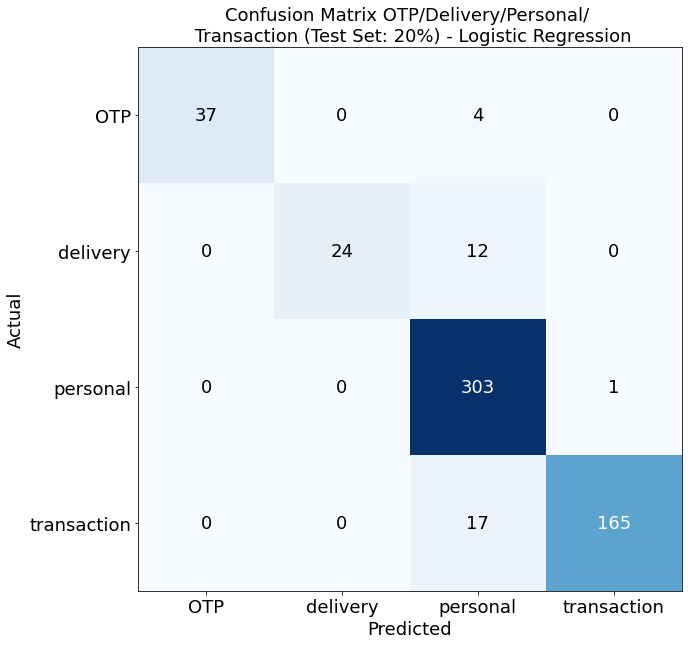

Naive Bayes : 0.8756660746003553

Classification Report: 
               precision    recall  f1-score   support

         OTP       1.00      0.51      0.68        41
    delivery       1.00      0.22      0.36        36
    personal       0.85      0.99      0.91       304
 transaction       0.91      0.90      0.91       182

    accuracy                           0.88       563
   macro avg       0.94      0.66      0.71       563
weighted avg       0.89      0.88      0.86       563


[[ 21   0   8  12]
 [  0   8  28   0]
 [  0   0 300   4]
 [  0   0  18 164]]


C:\Users\sarangs\Anaconda3\envs\selenium_project\lib\site-packages\ipykernel_launcher.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\sarangs\Anaconda3\envs\selenium_project\lib\site-packages\ipykernel_launcher.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator


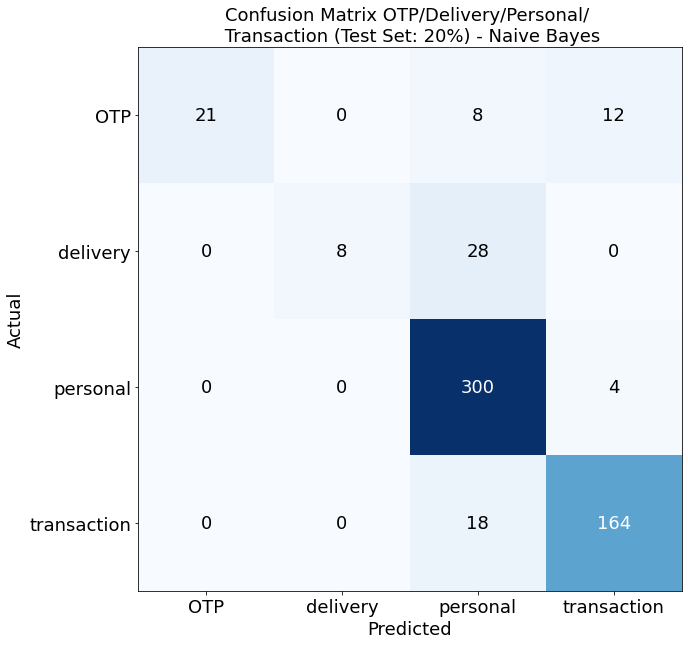

Random Forest : 0.9786856127886323

Classification Report: 
               precision    recall  f1-score   support

         OTP       1.00      0.98      0.99        41
    delivery       0.97      0.94      0.96        36
    personal       0.97      1.00      0.98       304
 transaction       0.99      0.95      0.97       182

    accuracy                           0.98       563
   macro avg       0.98      0.97      0.98       563
weighted avg       0.98      0.98      0.98       563


[[ 40   0   0   1]
 [  0  34   2   0]
 [  0   0 304   0]
 [  0   1   8 173]]


C:\Users\sarangs\Anaconda3\envs\selenium_project\lib\site-packages\ipykernel_launcher.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\sarangs\Anaconda3\envs\selenium_project\lib\site-packages\ipykernel_launcher.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator


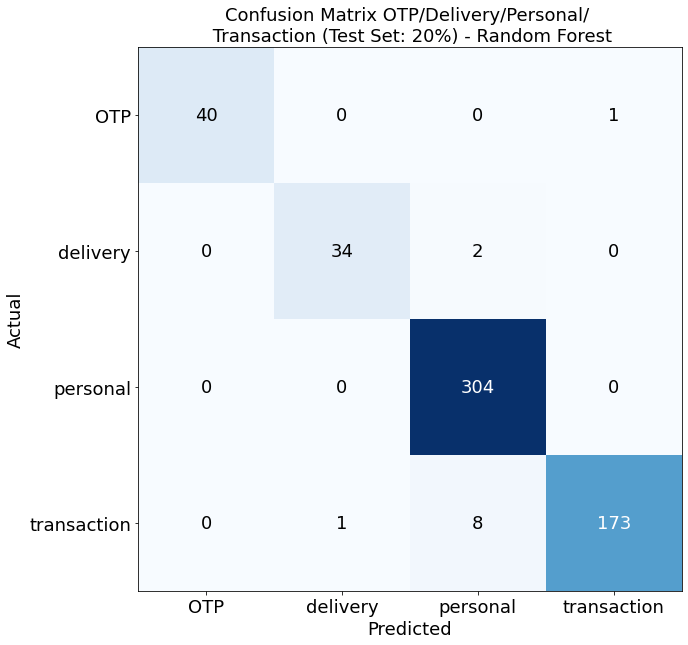

Support Vector Machine : 0.9662522202486679

Classification Report: 
               precision    recall  f1-score   support

         OTP       1.00      0.95      0.97        41
    delivery       0.94      0.89      0.91        36
    personal       0.95      1.00      0.97       304
 transaction       0.99      0.93      0.96       182

    accuracy                           0.97       563
   macro avg       0.97      0.94      0.96       563
weighted avg       0.97      0.97      0.97       563


[[ 39   0   1   1]
 [  0  32   4   0]
 [  0   0 304   0]
 [  0   2  11 169]]


C:\Users\sarangs\Anaconda3\envs\selenium_project\lib\site-packages\ipykernel_launcher.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\sarangs\Anaconda3\envs\selenium_project\lib\site-packages\ipykernel_launcher.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator


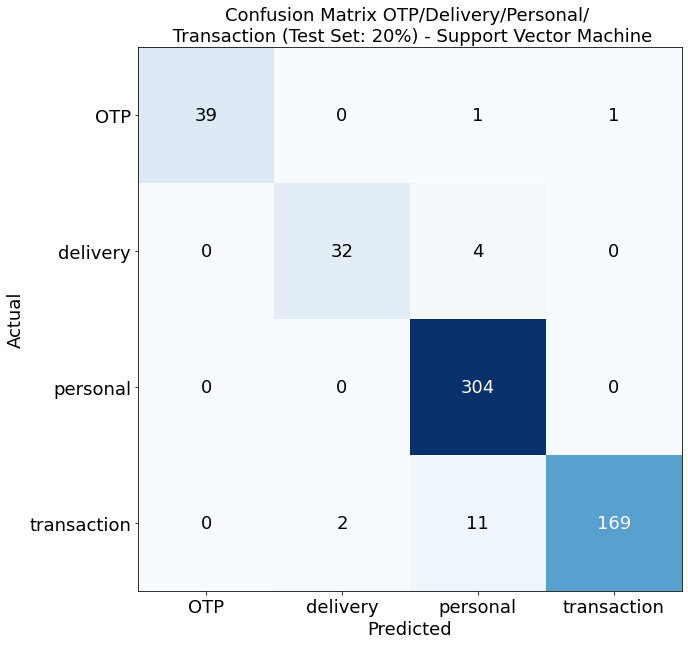

Ensamble : 0.9644760213143873

Classification Report: 
               precision    recall  f1-score   support

         OTP       1.00      0.98      0.99        41
    delivery       0.94      0.89      0.91        36
    personal       0.94      1.00      0.97       304
 transaction       1.00      0.92      0.96       182

    accuracy                           0.96       563
   macro avg       0.97      0.95      0.96       563
weighted avg       0.97      0.96      0.96       563


[[ 40   0   1   0]
 [  0  32   4   0]
 [  0   0 304   0]
 [  0   2  13 167]]


C:\Users\sarangs\Anaconda3\envs\selenium_project\lib\site-packages\ipykernel_launcher.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\sarangs\Anaconda3\envs\selenium_project\lib\site-packages\ipykernel_launcher.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator


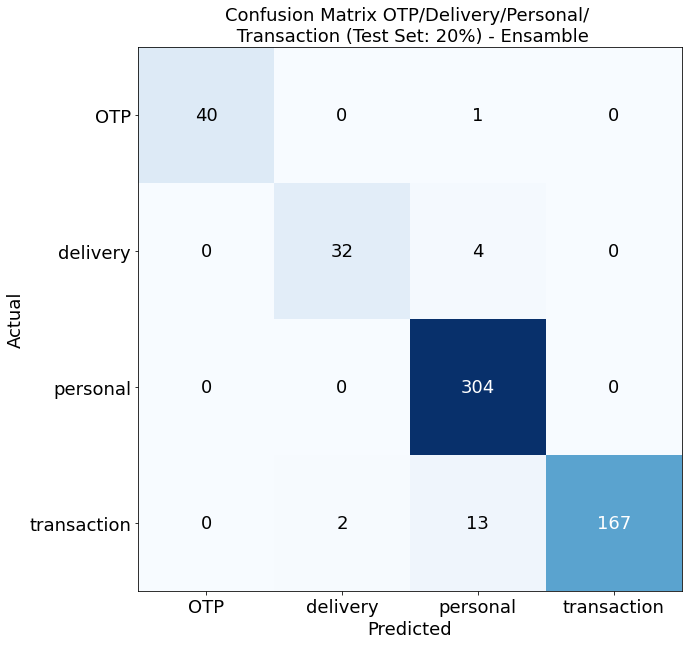

In [29]:
import numpy as num
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

target_transaction = ['OTP','delivery','personal','transaction']

plt.rcParams.update({'font.size': 18})



clfs = {
        'Logistic Regression': LogisticRegression(), 
        'Naive Bayes': MultinomialNB(),   
        'Random Forest': RandomForestClassifier(), 
        'Support Vector Machine': SVC(kernel = 'linear', probability = True),
        'Ensamble' : VotingClassifier(estimators=[('lr', LogisticRegression()), 
                                                  ('rf', RandomForestClassifier()),
                                                  ('svm', SVC(kernel = 'linear', probability = True))], voting='hard')
 
       }


def test_clf(clf_dict, Xtrain, ytrain, Xtest, ytest):
    for clf_name, clf in clf_dict.items():
        clf.fit(Xtrain, ytrain)
        predicted = clf.predict(Xtest)
        print(clf_name,":",np.mean(predicted == ytest))
        print()
        print("Classification Report: \n",classification_report(ytest, predicted, target_names = target_transaction))
        print() 
        cm = confusion_matrix(ytest, predicted)
        print(cm)
        fig, ax = plot_confusion_matrix(conf_mat = cm)
        plt.title('Confusion Matrix OTP/Delivery/Personal/ \n Transaction (Test Set: 20%) - '+clf_name, fontsize=18)
        fig.set_size_inches(10,10)
        ax.set_xticklabels([''] + target_transaction, fontsize=18)
        ax.set_yticklabels([''] + target_transaction, fontsize=18)
        plt.xlabel('Predicted', fontsize=18)
        plt.ylabel('Actual', fontsize=18)
        plt.show()
      
       
        
        
        
test_clf(clfs, X_train, y_train, X_test, y_test)